<H1 style="color:#8B7959">ADIA</H1>

<H2 style="color:#8B7959">PIPELINE EXAMPLE</H2>

In [1]:
import sys

In [2]:
github_folder_path = r'..'  # Relative path
if github_folder_path not in sys.path:
    sys.path.append(github_folder_path)

from L0_Library.config import *
from L1_Dev.data_prep import DataPrep
from L1_Dev.news import News
from L1_Dev.clusters import Clusters

In [3]:
pipeline = DataPrep(API_key='db-SEbmRhQ3ekjnrdRQLfK4iDYJhVkrL',
                    dataset='XNAS.ITCH',
                    start_date=datetime(2019, 1, 1),  # Might be good to use datetime.date
                    start_hour=9,
                    start_minute=30,
                    end_date=datetime(2019, 12, 31),
                    end_hour=16,
                    end_minute=0,
                    time_zone='US/Eastern')

In [4]:
pipeline_news = News(base_url='https://stocknewsapi.com/api/v1',
                     API_key='7vjl2kzbnxdltdz2hxixyzhbc07yltk4keyh5az9',
                     start_date=datetime(2019, 1, 1),
                     end_date=datetime(2020, 3, 7))

In [5]:
clusters = Clusters()

<H3 style="color:#8B7959">LOB DATA</H3>

In [ ]:
# Get data from DataBento
df_lob_data, trading_days, trading_dates = pipeline.get_data('TSLA')
df_lob_data

<H3 style="color:#8B7959">PRICES</H3>

In [ ]:
# Calculate prices
df_prices = pipeline.mid_price(df_input=df_lob_data, resample_freq='1T', type_mid='vwmp', drop_na=False)
df_prices

<H3 style="color:#8B7959">RETURNS</H3>

In [ ]:
# Calculate returns
df_returns = pipeline.returns(df_input=df_prices)
df_returns

<H3 style="color:#8B7959">BIPOWER VARIATION</H3>

In [ ]:
# Calculate bipower variation
df_bipower_variation = pipeline.rolling_bipower_variation(df_input=df_returns, K=390)
df_bipower_variation

<H3 style="color:#8B7959">PERIODICITY</H3>

In [ ]:
# Calculate periodicity
df_std_returns_1 = df_returns / np.sqrt(df_bipower_variation)
df_f0 = pipeline.df_periodicity(df_input=df_std_returns_1, threshold=16)
df_std_returns_2 = df_std_returns_1 / df_f0
df_f1 = pipeline.df_periodicity(df_input=df_std_returns_2, threshold=6.635)
df_f = df_f0 * df_f1
df_f

In [ ]:
# Plot periodicity
%matplotlib inline
sns.set_style("whitegrid")
plt.scatter(pd.to_datetime(df_f0.index, format='%H:%M:%S'), df_f0.iloc[:, 1], label='f_0', marker='o')
plt.scatter(pd.to_datetime(df_f.index, format='%H:%M:%S'), df_f.iloc[:, 1], label='f', marker='o')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
plt.xticks(rotation=0)
plt.xlabel('Market Hour')
plt.ylabel('Periodicity')
plt.title('Periodicity by Minute')
plt.legend()
plt.tight_layout()
plt.show()

<H3 style="color:#8B7959">JUMP SCORE</H3>

In [ ]:
# Calculate jump score
df_jump_score = pipeline.jump_score(df_returns=df_returns, df_bipower_variation=df_bipower_variation, df_f=df_f)
df_jump_score

In [ ]:
# Calculate quantiles and generate the QQ plot
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
stats.probplot(df_returns.unstack().dropna(), dist='norm', plot=axes[0])
axes[0].set_title('Returns QQ Plot')
axes[0].set_ylabel('Ordered Values')
stats.probplot(df_std_returns_1.unstack().dropna(), dist='norm', plot=axes[1])
axes[1].set_title('Std Returns #1 QQ Plot')
axes[1].set_ylabel('')
stats.probplot(df_std_returns_2.unstack().dropna(), dist='norm', plot=axes[2])
axes[2].set_title('Std Returns #2 QQ Plot')
axes[2].set_ylabel('')
stats.probplot(df_jump_score.unstack().dropna(), dist='norm', plot=axes[3])
axes[3].set_title('Jump Score QQ Plot')
axes[3].set_ylabel('')
plt.show()

<H3 style="color:#8B7959">JUMPS</H3>

In [7]:
# Get jumps
df_jumps = pipeline.get_jumps(df_input=df_jump_score)
df_jumps
# Filter jumps
# df_jumps[(df_jumps.index < pd.to_datetime('09:37:00').time())]
# df_jumps.loc[pd.to_datetime('09:37:00').time(), '2019-01-03']

Date,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
Hour,,,,,,,,,,,,,,,,,,,,,
09:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09:31:00,NaN,0,0,NaN,NaN,0,0,0,0,0,...,NaN,0,0,NaN,0,0,NaN,NaN,0,0
09:32:00,NaN,0,0,NaN,NaN,0,0,0,0,0,...,NaN,0,0,NaN,0,0,NaN,NaN,0,0
09:33:00,NaN,0,0,NaN,NaN,0,0,0,0,0,...,NaN,0,0,NaN,0,0,NaN,NaN,0,0
09:34:00,NaN,0,0,NaN,NaN,0,0,0,0,0,...,NaN,0,0,NaN,0,0,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15:55:00,NaN,0,0,NaN,NaN,0,0,0,0,0,...,NaN,0,0,NaN,0,0,NaN,NaN,0,0
15:56:00,NaN,0,0,NaN,NaN,0,0,0,0,0,...,NaN,0,0,NaN,0,0,NaN,NaN,0,0
15:57:00,NaN,0,0,NaN,NaN,0,0,0,0,0,...,NaN,0,0,NaN,0,0,NaN,NaN,0,0


In [8]:
print(f'Total Number of Jumps Detected: {df_jumps.sum().sum()}')

Total Number of Jumps Detected: 141.0


In [9]:
list_dates_w_jumps = clusters.get_dates_with_jumps(df_input=df_jumps)
list_dates_w_jumps

['01/03/2019',
 '01/11/2019',
 '01/14/2019',
 '01/17/2019',
 '01/18/2019',
 '01/23/2019',
 '01/28/2019',
 '01/30/2019',
 '02/07/2019',
 '02/12/2019',
 '02/14/2019',
 '02/20/2019',
 '02/21/2019',
 '03/05/2019',
 '03/07/2019',
 '03/08/2019',
 '03/12/2019',
 '03/20/2019',
 '03/21/2019',
 '03/22/2019',
 '04/04/2019',
 '04/08/2019',
 '04/11/2019',
 '04/18/2019',
 '04/25/2019',
 '05/01/2019',
 '05/08/2019',
 '05/15/2019',
 '05/17/2019',
 '05/28/2019',
 '05/29/2019',
 '06/03/2019',
 '06/14/2019',
 '06/18/2019',
 '06/19/2019',
 '06/20/2019',
 '06/24/2019',
 '06/28/2019',
 '07/22/2019',
 '07/24/2019',
 '07/29/2019',
 '07/31/2019',
 '08/01/2019',
 '08/07/2019',
 '08/08/2019',
 '08/09/2019',
 '08/23/2019',
 '08/27/2019',
 '08/28/2019',
 '09/04/2019',
 '09/12/2019',
 '09/18/2019',
 '09/20/2019',
 '09/24/2019',
 '09/26/2019',
 '10/01/2019',
 '10/03/2019',
 '10/08/2019',
 '10/10/2019',
 '10/15/2019',
 '10/18/2019',
 '10/21/2019',
 '10/23/2019',
 '10/25/2019',
 '11/04/2019',
 '11/05/2019',
 '11/06/20

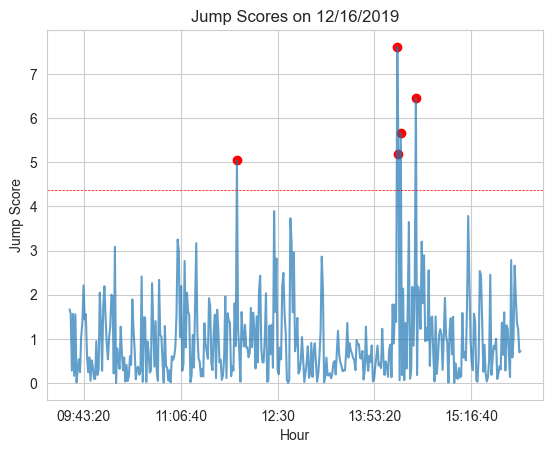

In [10]:
plot_date = 75
ax = abs(df_jump_score[list_dates_w_jumps[plot_date]]).plot(ylabel='Jump Score',
                                                            title=f'Jump Scores on {list_dates_w_jumps[plot_date]}', alpha=0.7)
markers = [i if i > 4.36 else np.nan for i in abs(df_jump_score[list_dates_w_jumps[plot_date]])]
ax.scatter(df_jump_score.index, markers, color='r')
ax.axhline(y=4.36, color='red', linestyle='--', lw=0.5, label='Threshold')
plt.show()

In [19]:
df_threshold.unstack().dropna()[df_threshold.unstack().dropna() == np.inf]

Series([], dtype: float64)

<H3 style="color:#8B7959">JUMPS INTER-TIMES</H3>

In [16]:
df_inter_times = clusters.calculate_jump_inter_times(df_input=df_jumps, list_input=list_dates_w_jumps)
df_inter_times

Date,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
Hour,,,,,,,,,,,,,,,,,,,,,
09:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09:31:00,NaN,0,0,NaN,NaN,0,0,0,0,0,...,NaN,0,0,NaN,0,0,NaN,NaN,0,0
09:32:00,NaN,0,0,NaN,NaN,0,0,0,0,0,...,NaN,0,0,NaN,0,0,NaN,NaN,0,0
09:33:00,NaN,0,0,NaN,NaN,0,0,0,0,0,...,NaN,0,0,NaN,0,0,NaN,NaN,0,0
09:34:00,NaN,0,0,NaN,NaN,0,0,0,0,0,...,NaN,0,0,NaN,0,0,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15:55:00,NaN,0,0,NaN,NaN,0,0,0,0,0,...,NaN,0,0,NaN,0,0,NaN,NaN,0,0
15:56:00,NaN,0,0,NaN,NaN,0,0,0,0,0,...,NaN,0,0,NaN,0,0,NaN,NaN,0,0
15:57:00,NaN,0,0,NaN,NaN,0,0,0,0,0,...,NaN,0,0,NaN,0,0,NaN,NaN,0,0


<H3 style="color:#8B7959">BERNOULLI HYPOTHESIS-TEST IMPLIED PROBABILITY</H3>

In [12]:
df_bernoulli_p = clusters.bernoulli_trials_p(df_input=df_jumps, rolling_window=7800) # Fix prob 0 which makes threshold inf
df_bernoulli_p

Date,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
Hour,,,,,,,,,,,,,,,,,,,,,
09:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09:31:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.00167,0.00167,NaN,0.00167,0.00167,NaN,NaN,0.00141,0.00141
09:32:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.00167,0.00167,NaN,0.00167,0.00167,NaN,NaN,0.00141,0.00141
09:33:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.00167,0.00167,NaN,0.00167,0.00167,NaN,NaN,0.00141,0.00141
09:34:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.00167,0.00167,NaN,0.00167,0.00167,NaN,NaN,0.00141,0.00141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.00167,0.00167,NaN,0.00167,0.00141,NaN,NaN,0.00141,0.00128
15:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.00167,0.00167,NaN,0.00167,0.00141,NaN,NaN,0.00141,0.00128
15:57:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.00167,0.00167,NaN,0.00167,0.00141,NaN,NaN,0.00141,0.00128


In [13]:
# Sample list with zeros
data = pd.Series([1, 0, 0, 2, np.nan, 0, 0, 3, 0, 0, 0, 0, 4])

# Initialize a variable to keep track of the last non-zero value
last_non_zero = None

# Iterate through the list and fill forward with the last non-zero value
data = data.dropna().reset_index(drop=True)
print(data)
for i in range(len(data)):
    if data[i] != 0:
        last_non_zero = data[i]
    elif last_non_zero is not None:
        data[i] = last_non_zero

# Print the modified list
print(data)


0    1.00000
1    0.00000
2    0.00000
3    2.00000
4    0.00000
5    0.00000
6    3.00000
7    0.00000
8    0.00000
9    0.00000
10   0.00000
11   4.00000
dtype: float64
0    1.00000
1    1.00000
2    1.00000
3    2.00000
4    2.00000
5    2.00000
6    3.00000
7    3.00000
8    3.00000
9    3.00000
10   3.00000
11   4.00000
dtype: float64


<H3 style="color:#8B7959">BERNOULLI HYPOTHESIS-TEST IMPLIED THRESHOLD</H3>

In [14]:
df_threshold = clusters.bernoulli_hypothesis_threshold(df_input=df_bernoulli_p)
df_threshold

Date,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
Hour,,,,,,,,,,,,,,,,,,,,,
09:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09:31:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,29.75032,29.75032,NaN,29.75032,29.75032,NaN,NaN,35.34596,35.34596
09:32:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,29.75032,29.75032,NaN,29.75032,29.75032,NaN,NaN,35.34596,35.34596
09:33:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,29.75032,29.75032,NaN,29.75032,29.75032,NaN,NaN,35.34596,35.34596
09:34:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,29.75032,29.75032,NaN,29.75032,29.75032,NaN,NaN,35.34596,35.34596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,29.75032,29.75032,NaN,29.75032,35.34596,NaN,NaN,35.34596,38.98312
15:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,29.75032,29.75032,NaN,29.75032,35.34596,NaN,NaN,35.34596,38.98312
15:57:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,29.75032,29.75032,NaN,29.75032,35.34596,NaN,NaN,35.34596,38.98312


<H3 style="color:#8B7959">CLUSTERED JUMPS</H3>

In [17]:
df_clustered_jumps = clusters.cluster_jumps(df_jumps=df_jumps, df_inter_times=df_inter_times, df_threshold=df_threshold,
                                            list_dates_w_jumps=list_dates_w_jumps)
df_clustered_jumps

Date,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
Hour,,,,,,,,,,,,,,,,,,,,,
09:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09:31:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0,NaN,0,0,NaN,NaN,0,0
09:32:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0,NaN,0,0,NaN,NaN,0,0
09:33:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0,NaN,0,0,NaN,NaN,0,0
09:34:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0,NaN,0,0,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0,NaN,0,0,NaN,NaN,0,0
15:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0,NaN,0,0,NaN,NaN,0,0
15:57:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0,NaN,0,0,NaN,NaN,0,0


In [18]:
print(f'Total Number of Jump Clusters Detected: {df_clustered_jumps.sum().sum()}')

Total Number of Jump Clusters Detected: 95.0


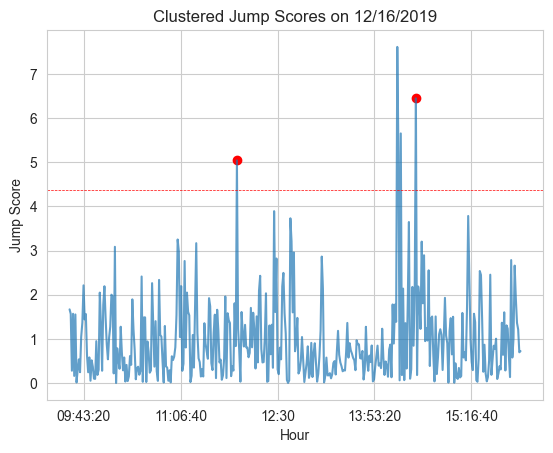

In [20]:
plot_date = 75
ax = abs(df_jump_score[list_dates_w_jumps[plot_date]]).plot(ylabel='Jump Score',
                                                            title=f'Clustered Jump Scores on {list_dates_w_jumps[plot_date]}', alpha=0.7)
markers = [value if (value > 4.36) & (df_clustered_jumps[list_dates_w_jumps[plot_date]].iloc[index] == 1) \
           else np.nan for index, value in enumerate(abs(df_jump_score[list_dates_w_jumps[plot_date]]))]
ax.scatter(df_jump_score.index, markers, color='r')
ax.axhline(y=4.36, color='red', linestyle='--', lw=0.5, label='Threshold')
plt.show()

In [21]:
# FITTING EXAMPLE

<Axes: xlabel='Hour'>

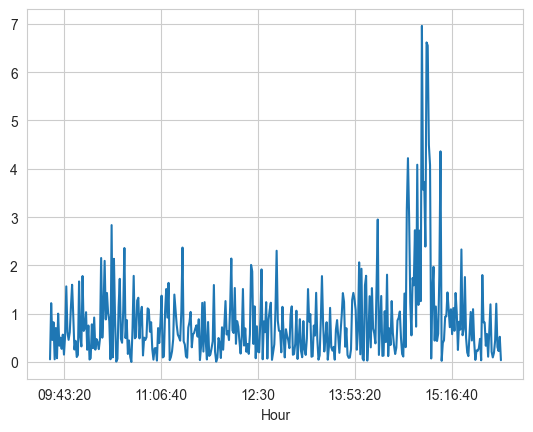

In [22]:
abs(df_jump_score[list_dates_w_jumps[3]]).plot()

In [23]:
test = df_jump_score[list_dates_w_jumps[3]].dropna().reset_index(drop=True)
test[test == -6.956441675069235]

320   -7
Name: 2019-01-17 00:00:00, dtype: float64

In [24]:
test_double = pd.DataFrame(test[252:388])
test = pd.DataFrame(test[320:388])
test

,2019-01-17
320,-7
321,-4
322,-4
323,-2
324,-7
...,...
383,-0
384,-1
385,-0
386,0


In [25]:
test.index = test.index - 320
test_double.index = test_double.index - 320

<Axes: >

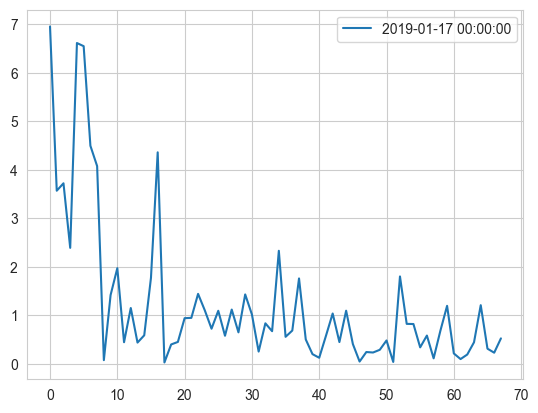

In [26]:
test = abs(test)
test_double = abs(test_double)
test.plot()

In [27]:
test = test.reset_index()
test_double = test_double.reset_index()

In [28]:
test.columns=['x', 'y']
test_double.columns=['x', 'y']

In [29]:
test

,x,y
0,0,7
1,1,4
2,2,4
3,3,2
4,4,7
...,...,...
63,63,0
64,64,1
65,65,0
66,66,0


<Axes: >

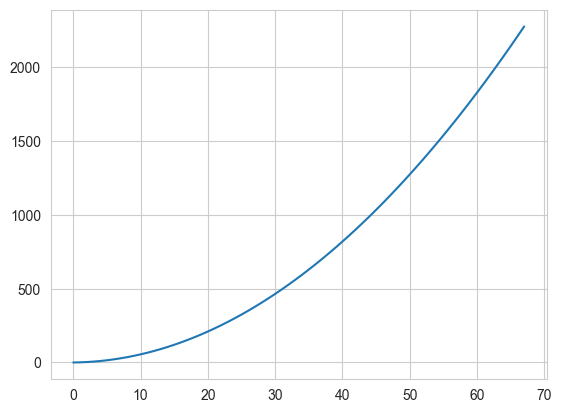

In [30]:
# As stated in the paper, it is easier to fit the cummulative function
test.cumsum()['x'].plot()

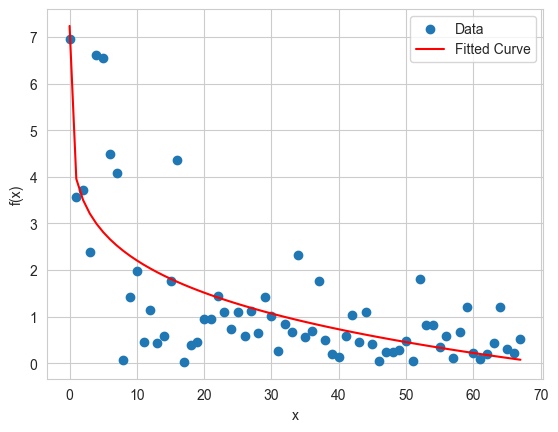

Fitted Parameters:
a: -3.2825211620575825
b: 0.18558440590949316
c: 7.23667818080192


In [31]:
import numpy as np
from scipy.optimize import least_squares
import matplotlib.pyplot as plt

# Define your power-law function
def power_law(params, x):
    a, b, c = params
    return a * x ** b + c

# Define the residual function for the least squares optimization
def residual(params, x, y):
    return y - power_law(params, x)

# Generate or load your data
x_data = np.array(test['x'])
y_data = np.array(test['y'])

# Initial guess for the parameters a and b
initial_params = [1.0, 1.0, 1.0]

# Fit the power-law model to your data using least_squares
result = least_squares(residual, initial_params, args=(x_data, y_data))

# Extract the fitted parameters
a_fit, b_fit, c_fit = result.x

# Plot the original data and the fitted curve
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, power_law([a_fit, b_fit, c_fit], x_data), 'r-', label='Fitted Curve')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

# Display the fitted parameters
print("Fitted Parameters:")
print(f"a: {a_fit}")
print(f"b: {b_fit}")
print(f"c: {c_fit}")


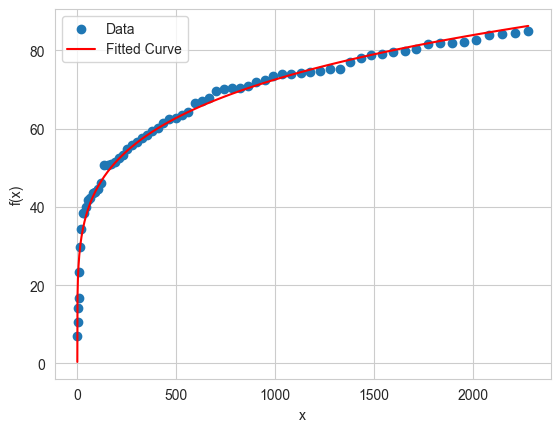

Fitted Parameters:
a: 16.823594992480682
b: 0.21088860621094163
c: 0.37227348332209675


In [32]:
import numpy as np
from scipy.optimize import least_squares
import matplotlib.pyplot as plt

# Define your power-law function
def power_law(params, x):
    a, b, c = params
    return a * x ** b + c

# Define the residual function for the least squares optimization
def residual(params, x, y):
    return y - power_law(params, x)

# Generate or load your data
x_data = np.array(test['x'].cumsum())
y_data = np.array(test['y'].cumsum())

# Initial guess for the parameters a and b
initial_params = [1.0, 1.0, 1.0]

# Fit the power-law model to your data using least_squares
result = least_squares(residual, initial_params, args=(x_data, y_data))

# Extract the fitted parameters
a_fit, b_fit, c_fit = result.x

# Plot the original data and the fitted curve
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, power_law([a_fit, b_fit, c_fit], x_data), 'r-', label='Fitted Curve')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

# Display the fitted parameters
print("Fitted Parameters:")
print(f"a: {a_fit}")
print(f"b: {b_fit}")
print(f"c: {c_fit}")


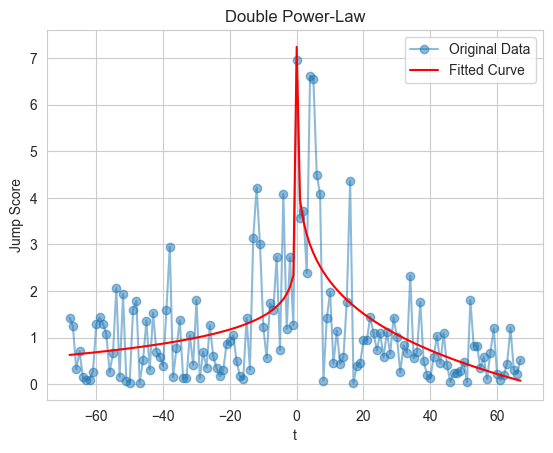

Fitted Parameters:
N_l: -4.909920192373925
N_r: -3.284426218025011
p_l: 0.07051210865007525
p_r: 0.1855171711494435
d: 7.238826072138765


In [33]:
import numpy as np
from scipy.optimize import least_squares
import matplotlib.pyplot as plt

# Define the double power-law function
def double_power_law(params, t):
    N_l, N_r, p_l, p_r, d = params
    theta_l = np.where(t < 0, 1.0, 0.0)
    theta_r = np.where(t >= 0, 1.0, 0.0)
    return (N_l * theta_l * np.abs(t)**p_l) + (N_r * theta_r * np.abs(t)**p_r) + d

# Define the residual function for the least squares optimization
def residual(params, t, y):
    return y - double_power_law(params, t)

# Generate or load your data (replace with your own data)
t_data = test_double['x']
y_data = test_double['y']

# Initial guess for the parameters [N_l, N_r, p_l, p_r, d]
initial_params = [1.0, 1.0, 1.0, 1.0, 0.0]

# Fit the double power-law model to your data using least_squares
result = least_squares(residual, initial_params, args=(t_data, y_data))

# Extract the fitted parameters
N_l_fit, N_r_fit, p_l_fit, p_r_fit, d_fit = result.x

# Calculate the fitted values using the original t values
y_fit = double_power_law([N_l_fit, N_r_fit, p_l_fit, p_r_fit, d_fit], t_data)

# Plot the original data and the fitted curve
plt.plot(t_data, y_data, label='Original Data', marker='o', alpha=0.5)
plt.plot(t_data, y_fit, 'r-', label='Fitted Curve')
plt.title('Double Power-Law')
plt.xlabel('t')
plt.ylabel('Jump Score')
plt.legend()
plt.show()

# Display the fitted parameters
print("Fitted Parameters:")
print(f"N_l: {N_l_fit}")
print(f"N_r: {N_r_fit}")
print(f"p_l: {p_l_fit}")
print(f"p_r: {p_r_fit}")
print(f"d: {d_fit}")


<H3 style="color:#8B7959">STORE DATA IN HDF5 FORMAT</H3>

We could compare how much it would take to store the files in different formats. I pick the most efficient.
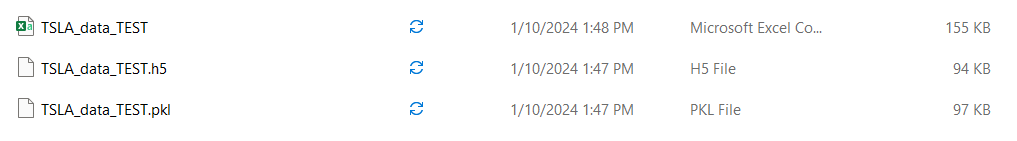

In [ ]:
# WRITE
hdf5_file_path = '../Data/TSLA_data.h5'

# Write the DataFrames to the HDF5 file
df_prices.to_hdf(hdf5_file_path, key='prices', mode='w')
df_returns.to_hdf(hdf5_file_path, key='returns', mode='a')
df_bipower_variation.to_hdf(hdf5_file_path, key='bipower_variation', mode='a')
df_f0.to_hdf(hdf5_file_path, key='periodicity_0', mode='a')
df_f1.to_hdf(hdf5_file_path, key='periodicity_1', mode='a')
df_f.to_hdf(hdf5_file_path, key='periodicity', mode='a')
df_jump_score.to_hdf(hdf5_file_path, key='jump_score', mode='a')
df_jumps.to_hdf(hdf5_file_path, key='jumps', mode='a')

# Create an HDF5 file and write DataFrames to it
with h5py.File(hdf5_file_path, 'a') as hdf_file:    
    # Add attributes to the file level
    hdf_file.attrs['Description'] = 'HDF5 File storing data pipeline'
    hdf_file.attrs['Start_Date'] = '01-01-2019'
    hdf_file.attrs['End_Date'] = '01-01-2019'
    hdf_file.attrs['Start_Time'] = '09:30'
    hdf_file.attrs['End_Time'] = '16:00'
    hdf_file.attrs['Time_Zone'] = 'US/Eastern'

In [6]:
# READ
hdf5_file_path = '../Data/TSLA_data.h5'

# Read the DataFrames from the HDF5 file
df_prices = pd.read_hdf(hdf5_file_path, key='prices')
df_returns = pd.read_hdf(hdf5_file_path, key='returns')
df_bipower_variation = pd.read_hdf(hdf5_file_path, key='bipower_variation')
df_f0 = pd.read_hdf(hdf5_file_path, key='periodicity_0')
df_f1 = pd.read_hdf(hdf5_file_path, key='periodicity_1')
df_f = pd.read_hdf(hdf5_file_path, key='periodicity')
df_jump_score = pd.read_hdf(hdf5_file_path, key='jump_score')
df_jumps = pd.read_hdf(hdf5_file_path, key='jumps')

# Open the HDF5 file to read attributes
with h5py.File('../Data/TSLA_data.h5', 'r') as hdf_file:
    # Get the attributes of the root group (the file itself)
    for attr_name, attr_value in hdf_file.attrs.items():
        if attr_name not in ['CLASS', 'VERSION', 'PYTABLES_FORMAT_VERSION', 'TITLE']:
            print(f"{attr_name}: {attr_value}")

Description: HDF5 File storing data pipeline
End_Date: 01-01-2019
End_Time: 16:00
Start_Date: 01-01-2019
Start_Time: 09:30
Time_Zone: US/Eastern


<H3 style="color:#8B7959">NEWS</H3>

In [ ]:
response = pipeline_news.get_news(symbol=['LULU'], items=4, page=1, news_type='article')

In [ ]:
try:
    for article in response[:4]:
        print(f"Title: {article['title']}")
        print(f"URL: {article['news_url']}")
        print(f"Image URL: {article['image_url']}")
        print(f"Text: {article['text']}")
        print(f"Source Name: {article['source_name']}")
        print(f"Date: {article['date']}")
        print(f"Topics: {article['topics']}")
        print(f"Sentiment: {article['sentiment']}")
        print(f"Type: {article['type']}")
        print(f"Tickers: {article['tickers']}\n")
except requests.exceptions.HTTPError as err:
    print(f"An error occurred: {err}")